In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Grab and process the raw data.
data_path = ("yelp_labelled.txt")
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'negative']

yelp_raw.head()

,review,negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [49]:
neg_keywords = ['bad', 'not good', 'disappointed', 'gross', 'dirty', 'bad service', 'rude', 'nasty', 'not', 'poor',
                'slow', 'awful', 'undercooked', 'lacked', 'vomit', 'sick', 'flop', 'sucks', 'never', "wasn't good",
                'wasted', 'overpriced', 'poor', 'manager', 'shocked']

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        str(key),
        case=0
    )

In [65]:
yelp_raw['negative'] = (yelp_raw['negative'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [24]:
yelp_raw.head()

,review,negative,bad,not good,disappointed,gross,dirty,bad service,rude,nasty,not
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,True,False,False,False,False,False,False,True
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,True,True
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,False


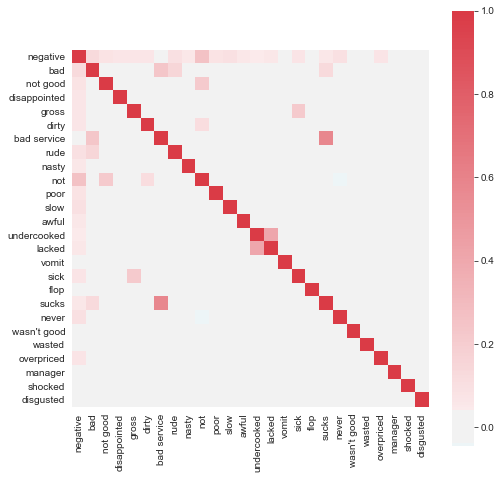

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(yelp_raw.corr(), square=True, cmap=cmap, center=0)

plt.show()

In [50]:
data = yelp_raw[neg_keywords]
target = yelp_raw['negative']

In [51]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 323
